# Cifar-10 이미지 분류 v1

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

* 데이터 전처리

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

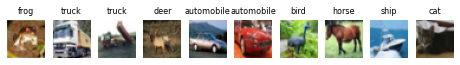

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i]), plt.axis('off')
    plt.title(class_names[y_train[i, 0]], fontsize = 8)
plt.show()

In [6]:
type(X_train[0])

numpy.ndarray

In [7]:
# X data : 0~1 사이의 실수(float32)로 변환(64bit을 32bit로 변환)(32bit면 충분하다고 봄)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype(np.float32) / 255

In [8]:
# y data : one_hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의/설정/학습/평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [10]:
model = Sequential([
                    Conv2D(32, (3, 3), padding = 'same', input_shape = (32, 32, 3), activation = 'relu'),
                    Conv2D(32, (3, 3), activation = 'relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(),
                    Dropout(0.25),
                    Flatten(),
                    Dense(512, activation = 'relu'),
                    Dropout(0.5),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [11]:
model.compile(
    optimizer = RMSprop(learning_rate=0.0001, decay = 1e-6),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model_path = 'best-cifar10-v1.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 100, batch_size = 32, verbose = 2,
    callbacks = [checkpoint, early_stop]
)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 1.57638, saving model to best-cifar10-v1.h5
1250/1250 - 32s - loss: 1.8291 - accuracy: 0.3283 - val_loss: 1.5764 - val_accuracy: 0.4258 - 32s/epoch - 26ms/step
Epoch 2/100

Epoch 00002: val_loss improved from 1.57638 to 1.38126, saving model to best-cifar10-v1.h5
1250/1250 - 20s - loss: 1.5227 - accuracy: 0.4424 - val_loss: 1.3813 - val_accuracy: 0.5053 - 20s/epoch - 16ms/step
Epoch 3/100

Epoch 00003: val_loss improved from 1.38126 to 1.27396, saving model to best-cifar10-v1.h5
1250/1250 - 20s - loss: 1.3962 - accuracy: 0.4948 - val_loss: 1.2740 - val_accuracy: 0.5529 - 20s/epoch - 16ms/step
Epoch 4/100

Epoch 00004: val_loss improved from 1.27396 to 1.24130, saving model to best-cifar10-v1.h5
1250/1250 - 21s - loss: 1.3007 - accuracy: 0.5336 - val_loss: 1.2413 - val_accuracy: 0.5561 - 21s/epoch - 17ms/step
Epoch 5/100

Epoch 00005: val_loss improved from 1.24130 to 1.19255, saving model to best-cifar10-v1.h5
1250/1250 - 21s - lo

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6684 - accuracy: 0.7787


[0.6683729887008667, 0.7786999940872192]

- 학습과정 시각화

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

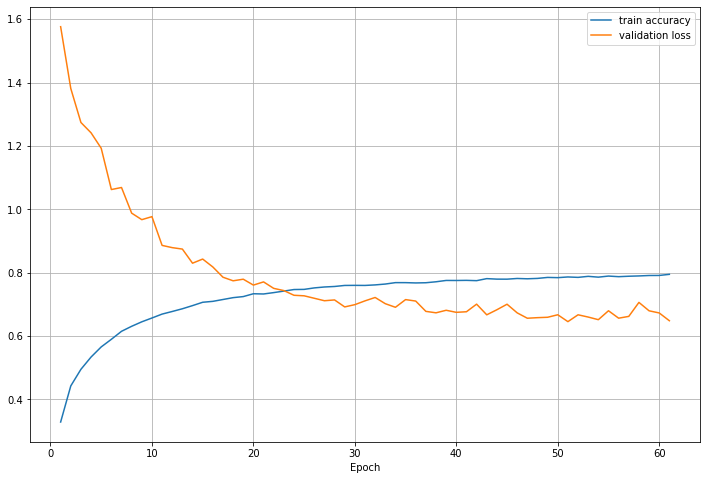

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(xs, y_acc, label = 'train accuracy')
plt.plot(xs, y_vloss, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()